# Из ландавшица и Румера
Полное число частиц:
\begin{equation}
    n = \frac{N}{V} = \frac{g m^{3 / 2}}{\sqrt{2} \pi^{2} \hbar^{3}} \int_{0}^{\infty} \frac{\sqrt{\varepsilon} d \varepsilon}{e^{(\varepsilon-\mu) / T} + 1}
    \label{eq-N}
\end{equation}

Энергия:
\begin{equation}
    E=\int_{0}^{\infty} \varepsilon d N_{\varepsilon}=\frac{g V m^{3 / 2}}{\sqrt{2} \pi^{2} \hbar^{3}} \int_{0}^{\infty} \frac{\varepsilon^{3 / 2} d \varepsilon}{e^{(\varepsilon-\mu) / T} + 1}
    \label{eq-E}
\end{equation}

Для заданных $T, N/V$ надо найти $E$, а затем и $P$ по формуле:
\begin{equation}
    PV = (2/3) E
\end{equation}


\begin{equation}
    \int_{0}^{\infty} \frac{\varepsilon^{n/2} d \varepsilon}{e^{\varepsilon / T-\mu / T} + 1} = \left|
    \begin{array}
        1\varepsilon / T = t; & d\varepsilon = T dt \\
        \varepsilon = t T;   & \varepsilon^{n/2} = (t T)^{n/2} \\
        \mu / T = x & \\
    \end{array}
    \right| = \int_{0}^{\infty} \frac{t^{n / 2} T^{n/2} T dt}{e^{t-x} + 1} = 
    T^{(n+2)/2} \int_{0}^{\infty} \frac{t^{n / 2} dt}{e^{t-x} + 1} = 
\end{equation}
\begin{equation}
    = T^{(n+2)/2} \, \Gamma((n+2)/2) F_{n/2} (x) = T^{(n+2)/2} \, \Gamma\left(\frac{n+2}{2}\right) F_{n/2} \left(\frac{\mu}{T}\right)
\end{equation}
где $n = 1$ или $2$, а $T = kT'$, где $T'$ выражена в СИ (Кельвин). 


Для числа частиц имеем:
\begin{equation}
    \frac{E}{V} \, \frac{\sqrt{2} \pi^{2} \hbar^{3}}{g m^{3 / 2}} - T^{3 / 2} \Gamma(3/2) F_{1 / 2}\left(\frac{\mu}{T}\right) = 0
\end{equation}

\begin{equation}
    F_{1 / 2}\left(\frac{\mu}{T}\right) = \frac{E}{V} \, \frac{\sqrt{2} \pi^{2} \hbar^{3}}{g m^{3 / 2}} \frac{1}{ T^{3 / 2} \Gamma(3/2) }
\end{equation}

Отсюда получаем $\mu$, а затем подставляем в выражение для $E$:
\begin{equation}
    E = \frac{g V m^{3 / 2}}{\sqrt{2} \pi^{2} \hbar^{3}} \int_{0}^{\infty} \frac{\varepsilon^{3 / 2} d \varepsilon}{e^{(\varepsilon-\mu) / T}+1} =
    \frac{g V m^{3 / 2}}{\sqrt{2} \pi^{2} \hbar^{3}} T^{5 / 2} \, \Gamma(5/2) \, F_{3 / 2}\left(\frac{\mu}{T}\right)
\end{equation}

\begin{equation}
    P = (2/3) E/V = \frac{\sqrt{2}g m^{3 / 2}}{3 \pi^{2} \hbar^{3}} T^{5 / 2} \, \Gamma(5/2) \, F_{3 / 2}\left(\frac{\mu}{T}\right)
\end{equation}

# Асимптотические формулы (T $\rightarrow$ 0)

\begin{equation}
    \frac{E}{V}=\frac{3\left(3 \pi^{2}\right)^{2 / 3}}{10} \frac{\hbar^{2}}{m}\left(\frac{N}{V}\right)^{5 / 3}
\end{equation}

\begin{equation}
    P=\frac{\left(3 \pi^{2}\right)^{2 / 3}}{5} \frac{\hbar^{2}}{m}\left(\frac{N}{V}\right)^{5 / 3}
\end{equation}

## Первые и вторые производные $F$ для идеального Ферми-газа

In [1]:
from sympy import init_session

In [2]:
init_session()

IPython console for SymPy 1.3 (Python 3.7.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [3]:
T, V = symbols('T V')
g = 2
N = Symbol('N')
# y = mu/T
y = Function('y')(T, V)
y._latex = lambda printer: r'y'
    
Int = lambda k, y: Function('I_' + str(k))(y)

def sub_fermi_derivs(expr, powers, variable):
    result = expr
    for power in powers:
        result = result.subs(diff(Int(power, variable), variable), power*Int(power-1, variable))
    return result

def sub_fermi_asymp(expr, powers, variable):
    result = expr
    for power in powers:
        # Костыля с делением на 2 больше нет. См. формулу 46.1а) из Ландавшица 5 том (стр.165)
        # Оказалось, что в выражение хим.потенциала входит g=2 в знаменатель
        result = result.subs(Int(power, variable), gamma(power+1)*(N/(2*V)*(2*pi/T)**Rational(3, 2)))
    return result

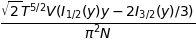

In [4]:
# TODO: вот тут лучше проверить. Я не знаю, оставили ли подгоны физ.смысл в этом выражении
F = sqrt(2)/pi**2*T**(Rational(5, 2))*V*(y*Int(Rational(1, 2), y) - Rational(2, 3)*Int(Rational(3, 2), y))
# По сути, разделив F для всей системы на N, мы получим F на одну частицу
F /= N
F

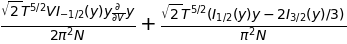

In [5]:
# F_V
# Проверил на черновике
F_V = sub_fermi_derivs(diff(F, V).doit(), [Rational(i, 2) for i in range(-3, 4, 2)], y)
F_V

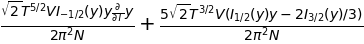

In [6]:
# F_T
# Верно из пред. пункта
F_T = sub_fermi_derivs(diff(F, T).doit(), [Rational(i, 2) for i in range(-3, 4, 2)], y)
F_T

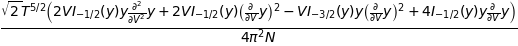

In [7]:
# F_VV
# Верно, проверил руками
F_VV = sub_fermi_derivs(diff(F_V, V).doit(), [Rational(i, 2) for i in range(-5, 6, 2)], y).simplify().factor()
F_VV

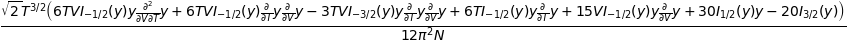

In [8]:
# F_VT
# Верно, проверил руками
F_VT = sub_fermi_derivs(diff(F_V, T).doit(), [Rational(i, 2) for i in range(-3, 4, 2)], y).simplify().factor()
F_VT

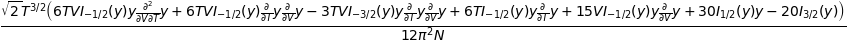

In [9]:
# F_VT
F_TV = sub_fermi_derivs(diff(F_T, V).doit(), [Rational(i, 2) for i in range(-3, 4, 2)], y).simplify().factor()
F_TV

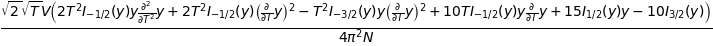

In [10]:
# F_TT
# Верно, по аналогии с двумя пунктами выше
F_TT = sub_fermi_derivs(diff(F_T, T).doit(), [Rational(i, 2) for i in range(-5, 6, 2)], y).simplify().factor()
F_TT

## Производные $\mu$

Чтобы найти производные, надо взять выражение
\begin{equation}
    I _ { 1 / 2 } \left( \frac { \mu } { T } \right) = n \, \frac { \sqrt { 2 } \pi ^ { 2 } } { g } \frac { 1 } { T ^ { 3 / 2 } \Gamma ( 3 / 2 ) }
\end{equation}

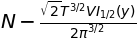

In [11]:
gamma_32 = Function('Gamma')(Rational(3, 2))
# Эта формула взята из (4) Калиткина
eq = N - g*T**(Rational(3, 2))*V*gamma(S(3)/2)/(sqrt(2)*pi**2)*Int(Rational(1, 2), y)
eq

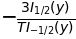

In [12]:
# Берем первую производную по T и разрешаем относительно dy/dT
# Верно, проверил на бумаге
y_T_symbolic = solve(
    sub_fermi_derivs(
        diff(eq, T).doit(), 
        [Rational(1, 2)], 
        y
    ),
    diff(y, T)
)[0]
y_T_symbolic

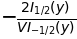

In [13]:
# Берем первую производную по V и разрешаем относительно dy/dV
# Верно, проверил на бумаге
y_V_symbolic = solve(
    sub_fermi_derivs(
        diff(eq, V).doit(), 
        [Rational(1, 2)], 
        y
    ),
    diff(y, V)
)[0]
y_V_symbolic

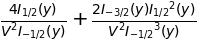

In [14]:
# Верно, проверил на бумаге
y_VV_symbolic = sub_fermi_derivs(
    diff(y_V_symbolic, V).doit(),
    [Rational(i, 2) for i in range(-5, 6, 2)],
    y
).subs(
    diff(y, V),
    y_V_symbolic
)
y_VV_symbolic

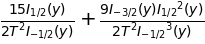

In [15]:
# Верно по аналогии с пред. пунктом
y_TT_symbolic = sub_fermi_derivs(
    diff(y_T_symbolic, T).doit(),
    [Rational(i, 2) for i in range(-5, 6, 2)],
    y
).subs(
    diff(y, T),
    y_T_symbolic
)
y_TT_symbolic

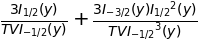

In [16]:
y_VT_symbolic = sub_fermi_derivs(
    diff(y_V_symbolic, T).doit(),
    [Rational(i, 2) for i in range(-5, 6, 2)],
    y
).subs(
    diff(y, T),
    y_T_symbolic
)
y_VT_symbolic

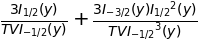

In [17]:
y_TV_symbolic = sub_fermi_derivs(
    diff(y_T_symbolic, V).doit(),
    [Rational(i, 2) for i in range(-5, 6, 2)],
    y
).subs(
    diff(y, V),
    y_V_symbolic
)
y_TV_symbolic

In [18]:
y_TV_symbolic - y_VT_symbolic

## Подстановка производных $y$ в производные $F$
Получили все производные для $y = y(T, V)$. Самое время их подставить в выражаения для производных $F$

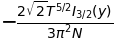

In [19]:
F_V_subed = F_V.subs(
    diff(y, V),
    y_V_symbolic
).simplify()
F_V_subed

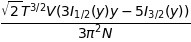

In [20]:
F_T_subed = F_T.subs(
    diff(y, T),
    y_T_symbolic
).simplify()
F_T_subed

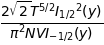

In [21]:
F_VV_subed = F_VV.subs(
    diff(y, V, V),
    y_VV_symbolic
).subs(
    diff(y, V),
    y_V_symbolic
).simplify()
F_VV_subed

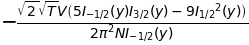

In [22]:
F_TT_subed = F_TT.subs(
    diff(y, T, T),
    y_TT_symbolic
).subs(
    diff(y, T),
    y_T_symbolic
).simplify()
F_TT_subed

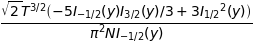

In [23]:
F_VT_subed = F_VT.subs(
    diff(y, T, V),
    y_TV_symbolic
).subs(
    diff(y, T),
    y_T_symbolic
).subs(
    diff(y, V),
    y_V_symbolic
).simplify()
F_VT_subed

## Подстановка производных $F$ в термодинамические функции

Итак, мы имеем все производные. Теперь можно заняться термодинамическими величинами.
Для этого стоит еще разок выписать их формулы:



\begin{align}
    & p = - F_V \\
    & S = -F_T \\ 
    & C_V = -T F_{TT} \\
    & C_P = -T F_{TT} + T \frac{(F_{VT})^2}{F_{VV}} \\
    & C_T = V \sqrt{F_{VV}} \\
    & C_S = V \sqrt{\frac{T F_{VT}^2 + C_V F_{VV}}{C_V}}
\end{align}

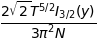

In [24]:
p_symbolic = -F_V_subed
p_symbolic

In [25]:
# Асимптотика на p
sub_fermi_asymp(p_symbolic, [S(3)/2], y).subs(exp(y), (2*pi/T)**(S(3)/2))

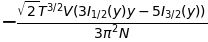

In [26]:
S_symbolic = -F_T_subed
S_symbolic

In [27]:
# Асимптотика S
sub_fermi_asymp(S_symbolic, [S(3)/2, S(1)/2], y).subs(exp(y), (2*pi/T)**(S(3)/2)).simplify()

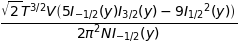

In [28]:
C_V_symbolic = (-T*F_TT_subed).simplify()
C_V_symbolic

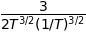

In [29]:
# Асимптотика C_V
sub_fermi_asymp(C_V_symbolic, [S(i)/2 for i in range(-5, 6, 2)], y).subs(exp(y), (2*pi/T)**(S(3)/2))

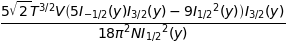

In [30]:
C_P_symbolic = (-T*F_TT_subed + T*F_VT_subed**2 / F_VV_subed).simplify()
C_P_symbolic

In [31]:
# Асимптотика C_P
sub_fermi_asymp(C_P_symbolic, [S(i)/2 for i in range(-5, 6, 2)], y).subs(exp(y), (2*pi/T)**(S(3)/2))

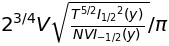

In [32]:
C_T_symbolic = (V*sqrt(F_VV_subed)).simplify()
C_T_symbolic

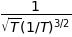

In [33]:
# Асимптотика C_T**2
sub_fermi_asymp(C_T_symbolic**2, [S(i)/2 for i in range(-5, 6, 2)], y).subs(exp(y), (2*pi/T)**(S(3)/2))

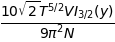

In [34]:
C_S_symbolic = (V*sqrt((T*F_VT_subed**2+C_V_symbolic*F_VV_subed)/C_V_symbolic)).simplify()
C_S_symbolic**2

In [35]:
# Асимптотика C_S**2
sub_fermi_asymp(C_S_symbolic**2, [S(3)/2], y).subs(exp(y), (2*pi/T)**(S(3)/2))

Везде $y = \mu / T$, а все величины в атомной системе единиц.